## Assigment 6

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from a6_utils import drawEllipse

### Exercise 1

### A

A = (3, 4), B = (3, 6), C = (7, 6), and D = (6, 4)  

mean value of X = (3 + 3 + 7 + 6, 4 + 6 + 6 + 4) / 4 = (19, 20) / 4 = (4.75, 5)  

centered X matrix:

$$\begin{bmatrix} -1.75 & -1.75 & 2.25 & 1.25 \\ -1 & 1 & 1 & -1 \end{bmatrix}$$

covariance matrix: 

$$\begin{bmatrix} \frac{17}{4} & \frac{1}{4} \\ \frac{1}{4} & 1 \end{bmatrix}$$


### B

In [101]:
def mean_value(X):
    return np.sum(X, axis=1)/X.shape[1]

def centered(X):
    return X - mean_value(X)[:,None]

def covariance_matrix(X):
    return np.dot(centered(X), centered(X).T)/(X.shape[1])

def eigenvalues_vectors(X):
    u, s, vh = np.linalg.svd(covariance_matrix(X))
    return s, u


In [102]:
points = np.fromfile('./assigments/assignment6/data/points.txt', dtype=float, sep=' ').reshape(-1, 2).T
points

array([[1., 6., 5., 1., 0.],
       [0., 2., 4., 3., 1.]])

(-2.0, 8.0)

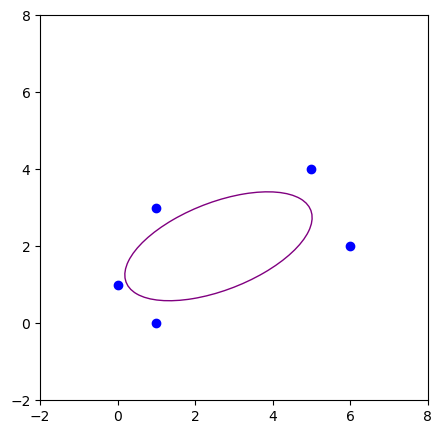

In [103]:
fig = plt.figure(figsize=(5,5))

plt.scatter(points[0], points[1], color='blue')
drawEllipse(mean_value(points), covariance_matrix(points), n_std=1)

plt.xlim(-2, 8)
plt.ylim(-2, 8)

### C

In [104]:
evalues, evectors = eigenvalues_vectors(points)
evalues, evectors

(array([6.55180546, 1.28819454]),
 array([[-0.92992935, -0.36773822],
        [-0.36773822,  0.92992935]]))

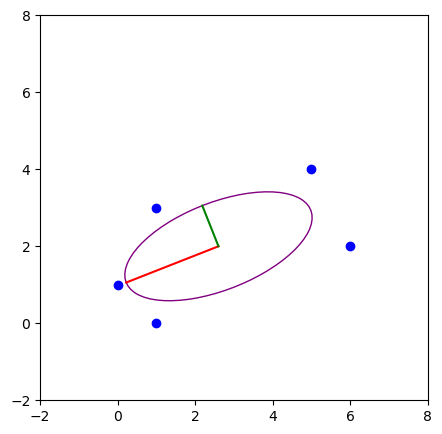

In [105]:
fig = plt.figure(figsize=(5,5))

plt.scatter(points[0], points[1], color='blue')
drawEllipse(mean_value(points), covariance_matrix(points), n_std=1)

plt.xlim(-2, 8)
plt.ylim(-2, 8)

mean_point = mean_value(points)

# draw lines
center = mean_point
end_red = mean_point + evectors[:,0] * np.sqrt(evalues[0])
end_green = mean_point + evectors[:,1] * np.sqrt(evalues[1])
plt.plot([center[0], end_red[0]], [center[1], end_red[1]], color='red')
plt.plot([center[0], end_green[0]], [center[1], end_green[1]], color='green')

### D

<BarContainer object of 2 artists>

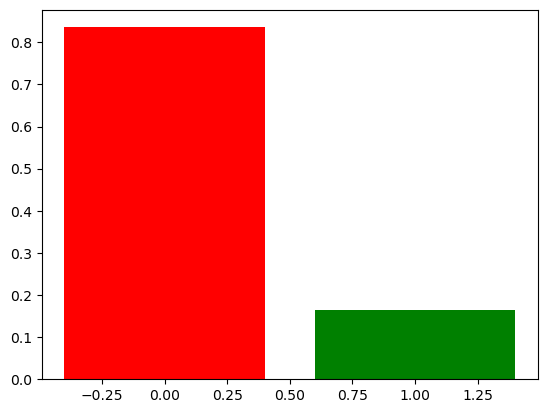

In [106]:
# plot the eigenvalues
plt.bar([0, 1], evalues/np.sum(evalues), color=['red', 'green'])

### E

(-5.0, 5.0)

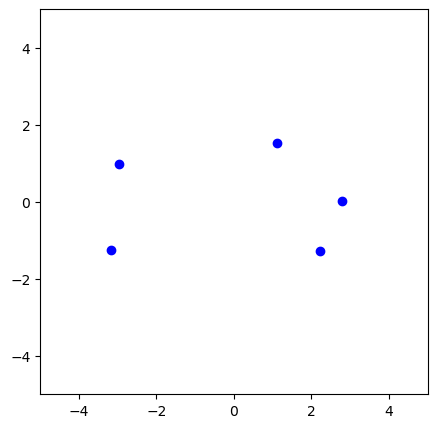

In [107]:
fig = plt.figure(figsize=(5,5))

pca_points = np.dot(evectors.T, centered(points))
plt.scatter(pca_points[0], pca_points[1], color='blue')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [108]:
# 'projected' points
pca_projected_points = pca_points.copy()
pca_projected_points[1] = 0

reconstructed_points = np.dot(evectors, pca_projected_points) + mean_value(points)[:, None]

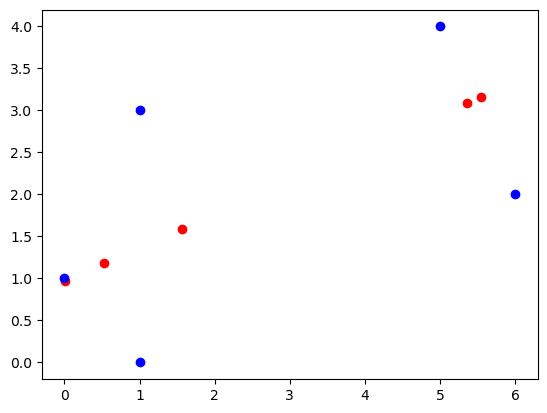

In [109]:
plt.scatter(reconstructed_points[0], reconstructed_points[1], color='red')
plt.scatter(points[0], points[1], color='blue')

### F

In [110]:
q_point = np.array([[6], [6]])

closes_point = np.argmin(np.linalg.norm(points - q_point, axis=0))

pca_q_point = np.dot(evectors.T, q_point - mean_value(points)[:, None])
pca_q_point[1] = 0

reconstructed_q_point = np.dot(evectors, pca_q_point) + mean_value(points)[:, None]

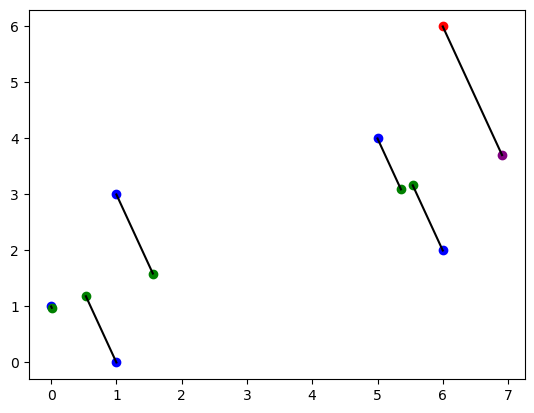

In [111]:
plt.scatter(points[0], points[1], color='blue')
plt.scatter(q_point[0], q_point[1], color='red')

plt.scatter(reconstructed_points[0], reconstructed_points[1], color='green')
plt.scatter(reconstructed_q_point[0], reconstructed_q_point[1], color='purple')

plt.plot([q_point[0], reconstructed_q_point[0]], [q_point[1], reconstructed_q_point[1]], color='black')
for i in range(points.shape[1]):
    plt.plot([points[0, i], reconstructed_points[0, i]], [points[1, i], reconstructed_points[1, i]], color='black')

## Exercise 2

### A

In [112]:
def dual_pca(X):
    X_centered = centered(X)
    dual_cov = np.matmul(X_centered.T, X_centered) / X.shape[1]
    u, s, vh = np.linalg.svd(dual_cov)

    e = np.empty((X.shape[1], X.shape[0]))
    for i in range(X.shape[1]):
        e[i] = np.dot(X_centered, u[:, i]) / np.sqrt(X.shape[1] * s[i])
    return e

In [113]:
U = dual_pca(points).T
U[:, :2] # same as pca

array([[ 0.92992935, -0.36773822],
       [ 0.36773822,  0.92992935]])

### B

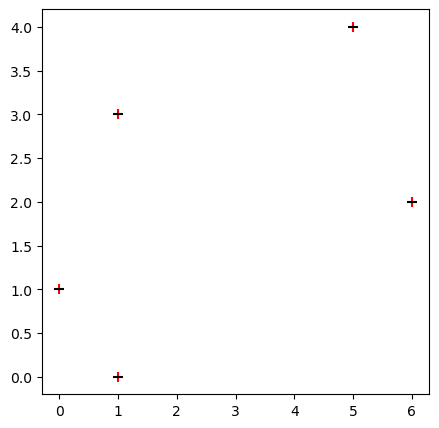

In [114]:
# offset
offset = mean_value(points)[:, None]

# project points
projected_points = np.dot(U.T, points - offset)

# reconstructed points
reconstructed_points = np.dot(U, projected_points) + offset

# plot
fig = plt.figure(figsize=(5,5))
plt.scatter(points[0], points[1], color='red', marker='|', s=50)
plt.scatter(reconstructed_points[0], reconstructed_points[1], color='black', marker='_', s=50)

## Exercise 3

### A

In [115]:
import os
import cv2
def load_space(directory):
    # load each image as a grayscale vector
    images = []
    image_shape = None
    for image_name in os.listdir(directory):
        image = cv2.imread(os.path.join(directory, image_name), cv2.IMREAD_GRAYSCALE)
        images.append(image.flatten())
        image_shape = image.shape
    return np.array(images), image_shape

In [116]:
space_one, one_sahpe = load_space('./assigments/assignment6/data/faces/1')
space_one.shape, one_sahpe

((64, 8064), (96, 84))

In [117]:
space_two, two_shape = load_space('./assigments/assignment6/data/faces/2')
space_two.shape, two_shape

((64, 8064), (96, 84))

In [118]:
space_three, three_shape = load_space('./assigments/assignment6/data/faces/3')
space_three.shape, three_shape

((64, 8064), (96, 84))

### B

In [119]:
def eginvectors_and_mean(X):
    _, v = eigenvalues_vectors(X.T)
    return v, mean_value(X.T)

In [120]:
space_one_eginvectors, space_one_means = eginvectors_and_mean(space_one)

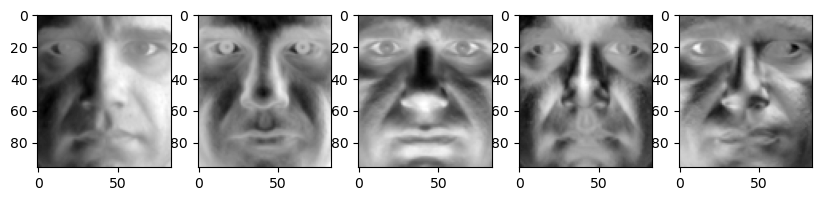

In [121]:
N = 5
fig = plt.figure(figsize=(10, 10))

for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(space_one_eginvectors[:, i].reshape(*one_sahpe), cmap='gray')

In [122]:
def project(X, eginvectors, mean):
    return np.dot(eginvectors.T, X - mean)
    
def reconstruct(X, eginvectors, mean):
    return np.dot(eginvectors, X) + mean

In [123]:
first_image = space_one[0]
first_image.shape

(8064,)

In [124]:
projected = project(first_image, space_one_eginvectors, space_one_means)

In [125]:
reconstructed = reconstruct(projected, space_one_eginvectors, space_one_means)
reconstructed.shape

(8064,)

In [153]:
projected_reduced = projected.copy()
projected_reduced[4074] = 0

projected_without_main = projected.copy()
projected_without_main[:10] = 0

In [154]:
reconstructed_reduced = reconstruct(projected_reduced, space_one_eginvectors, space_one_means)

In [155]:
reconstructed_without_main = reconstruct(projected_without_main, space_one_eginvectors, space_one_means)

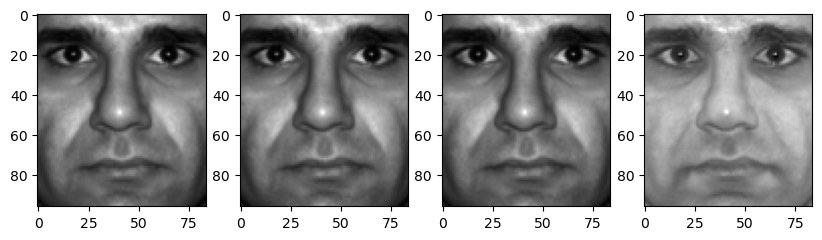

In [156]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(first_image.reshape(*one_sahpe), cmap='gray')

ax[1].imshow(reconstructed.reshape(*one_sahpe), cmap='gray')

ax[2].imshow(reconstructed_reduced.reshape(*one_sahpe), cmap='gray')

ax[3].imshow(reconstructed_without_main.reshape(*one_sahpe), cmap='gray')

### C

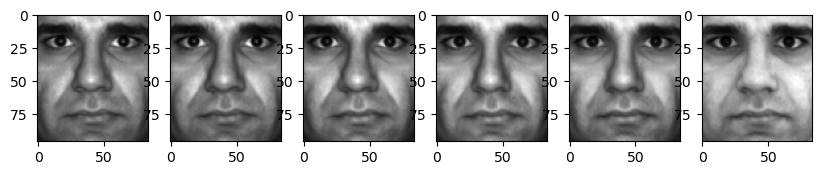

In [144]:
projected_step_reduce = projected.copy()

fig, ax = plt.subplots(1, 6, figsize=(10, 5))

for i in range(5, -1, -1):
    projected_step_reduce[2**i:] = 0
    reconstructed_step_reduce = reconstruct(projected_step_reduce, space_one_eginvectors, space_one_means)
    ax[5-i].imshow(reconstructed_step_reduce.reshape(*one_sahpe), cmap='gray')

### D

In [131]:
space_two_eginvectors, space_two_means = eginvectors_and_mean(space_two)

In [132]:
projected_mean = project(space_two[0], space_two_eginvectors, space_two_means)

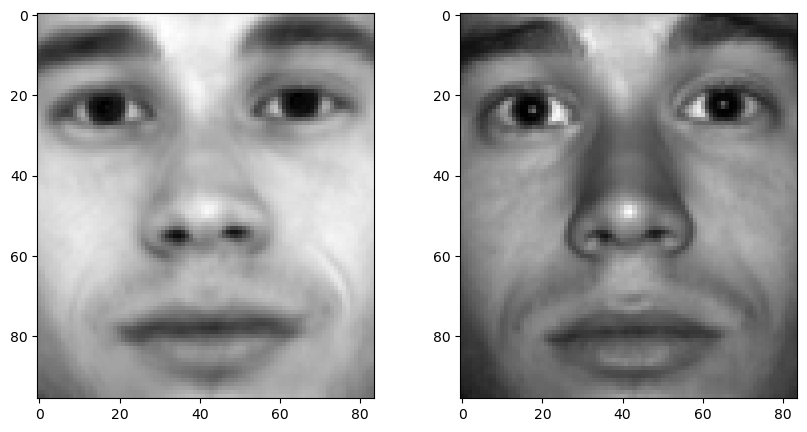

In [133]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(space_two_means.reshape(*two_shape), cmap='gray')

ax[1].imshow(reconstruct(projected_mean, space_two_eginvectors, space_two_means).reshape(*two_shape), cmap='gray')

In [134]:
def reconstruct_with_weight(X, i, scale=3000, loops=1, samples=100):
    local_egin = space_two_eginvectors.copy()
    for _ in range(loops):
        value = np.sin(np.linspace(0, 2*np.pi, num=samples))
        for v in value:
            local_egin[:, :i] = v * scale
            yield reconstruct(X, local_egin, space_two_means)


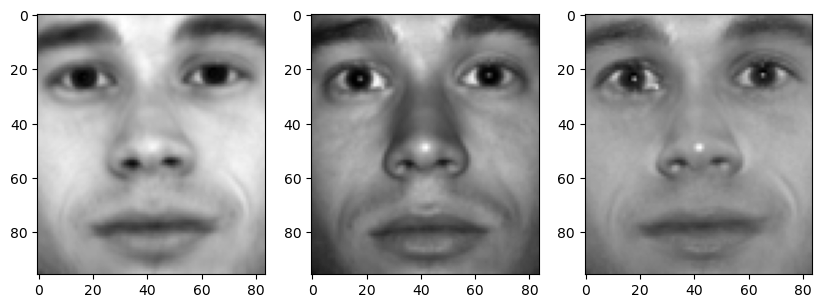

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [135]:
from time import sleep
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(space_two_means.reshape(*two_shape), cmap='gray')

ax[1].imshow(reconstruct(projected_mean, space_two_eginvectors, space_two_means).reshape(*two_shape), cmap='gray')

generator = reconstruct_with_weight(projected_mean, 10, loops=1, samples=10, scale=6000)
for img in generator:
    ax[2].imshow(img.reshape(*two_shape), cmap='gray')
    plt.draw()
    plt.pause(0.1)


### E

In [136]:
elephants = cv2.imread('./assigments/assignment6/data/elephant.jpg', cv2.IMREAD_GRAYSCALE)
elephants.shape

(96, 84)

In [137]:
elephants_vector = elephants.flatten()

In [138]:
reconstructed_elephants = reconstruct(project(elephants_vector, space_one_eginvectors, space_one_means), space_one_eginvectors, space_one_means)

In [140]:
space_one_reduced = space_one_eginvectors.copy()
space_one_reduced[:, 100:] = 0

In [141]:
reconstructed_elephants_reduced = reconstruct(project(elephants_vector, space_one_reduced, space_one_means), space_one_reduced, space_one_means)

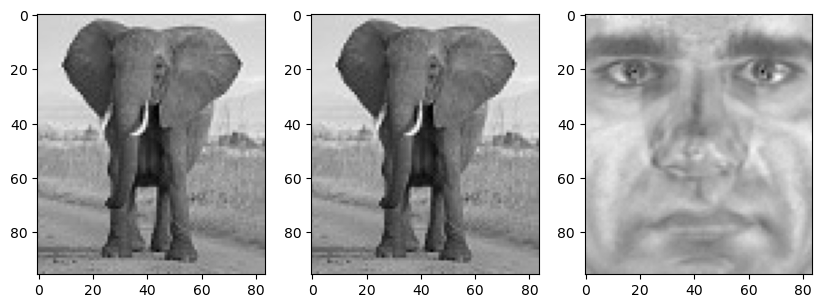

In [142]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

ax[0].imshow(elephants, cmap='gray')

ax[1].imshow(reconstructed_elephants.reshape(*elephants.shape), cmap='gray') # same because operations are reversible

ax[2].imshow(reconstructed_elephants_reduced.reshape(*elephants.shape), cmap='gray')